In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons

In [ ]:
#X,Y = make_blobs(n_samples = 500,n_features = 2,centers = 2,random_state = 11)

X,Y = make_moons(n_samples = 1000, shuffle = True,noise = 0.2, random_state = 1)

In [ ]:
print(X.shape)
print(Y.shape)

(1000, 2)
(1000,)


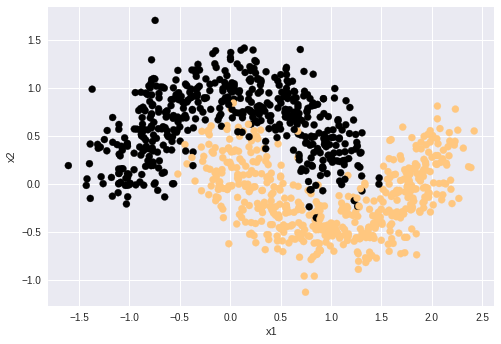

In [ ]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap = plt.cm.copper)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Define Model and helper Functions

In [ ]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

Implement perceptron learning algorithm
1. Learn the weights
2. Reduce the loss
3. Make the predictions

In [ ]:
def predict(X,weights):
    z = np.dot(X,weights)
    # X is a M x N matrix and weights is a M x 1 matrix
    
    predictions = sigmoid(z)
    return predictions

def loss_loop(X,Y,weights):
    #This loss is also known as binary cross entropy
    #There are two ways to write the loss function. With and without the for loop
    # The loss_loop function is written to write it with the for loop
    
    m = X.shape[0]
    Y_ = predict(X,weights)
    for i in range(m):
        J = Y[i]*np.log(Y_[i]) + (1 - Y[i])*np.log(1 - Y_[i])
        
    return -J/m

def loss(X,Y,weights):
    Y_ = predict(X,weights)
    
    cost = np.mean(-Y*np.log(Y_) - (1 - Y)*np.log(1 - Y_))
    
    return cost


def update(X,Y,weights,learning_rate):
    
    Y_ =  predict(X,weights)
    # dw is the derivative of the cost function with respect to w
    dw = np.dot(X.T,Y_ - Y)
    m = X.shape[0]
    weights = weights - learning_rate*(dw)/m
    
    return weights

def train(X,Y,learning_rate = 0.5,maxEpochs = 100):
    # modify the input matrix to handle the bias term
    m = X.shape[0]
    x_0 = np.ones((X.shape[0],1))
    
    X = np.hstack((x_0,X))
    
    lst = []
    weights = np.zeros(X.shape[1])
    
    for epoch in range(maxEpochs):
        weights = update(X,Y,weights,learning_rate)
        
        l = loss(X,Y,weights)
        lst.append(l)
        
        if epoch%10 == 0:
            print("epoch : %d "%epoch)
            print("loss : %.4f"%l)
            
            
    return weights,lst
    
    

In [ ]:
weights, loss_list = train(X,Y,learning_rate = 0.8,maxEpochs=1000)

epoch : 0 
loss : 0.6234
epoch : 10 
loss : 0.4134
epoch : 20 
loss : 0.3672
epoch : 30 
loss : 0.3457
epoch : 40 
loss : 0.3327
epoch : 50 
loss : 0.3239
epoch : 60 
loss : 0.3175
epoch : 70 
loss : 0.3128
epoch : 80 
loss : 0.3091
epoch : 90 
loss : 0.3063
epoch : 100 
loss : 0.3041
epoch : 110 
loss : 0.3023
epoch : 120 
loss : 0.3009
epoch : 130 
loss : 0.2997
epoch : 140 
loss : 0.2988
epoch : 150 
loss : 0.2980
epoch : 160 
loss : 0.2973
epoch : 170 
loss : 0.2968
epoch : 180 
loss : 0.2963
epoch : 190 
loss : 0.2959
epoch : 200 
loss : 0.2956
epoch : 210 
loss : 0.2953
epoch : 220 
loss : 0.2951
epoch : 230 
loss : 0.2949
epoch : 240 
loss : 0.2947
epoch : 250 
loss : 0.2946
epoch : 260 
loss : 0.2944
epoch : 270 
loss : 0.2943
epoch : 280 
loss : 0.2942
epoch : 290 
loss : 0.2941
epoch : 300 
loss : 0.2941
epoch : 310 
loss : 0.2940
epoch : 320 
loss : 0.2940
epoch : 330 
loss : 0.2939
epoch : 340 
loss : 0.2939
epoch : 350 
loss : 0.2938
epoch : 360 
loss : 0.2938
epoch : 370 

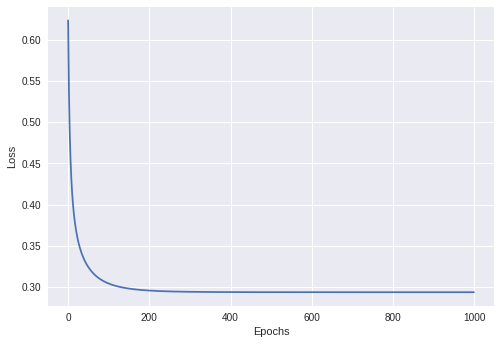

In [ ]:
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Get the predictions now

In [ ]:
def get_predictions(X_test,weights,labels = True):
    if X_test.shape[1] != weights.shape[0]:
        ones = np.ones((X_test.shape[0],1))
        
        X_test = np.hstack((ones,X_test))
        
    probs = predict(X_test,weights)
    
    if not labels :
        return probs
    
    else:
        labels = np.zeros(probs.shape)
        
        labels[probs>=0.5] = 1
        return labels
    
    

In [ ]:
x1 = np.linspace(-2,2.5)

x2 = -(weights[0] + weights[1]*x1)/weights[2]

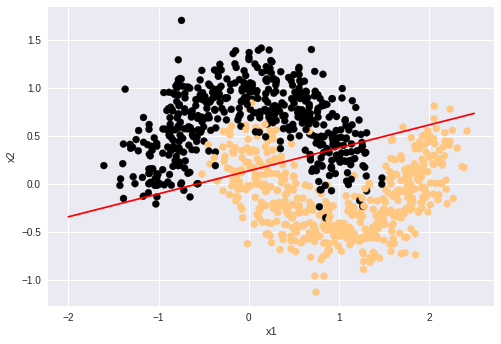

In [ ]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap = plt.cm.copper)
plt.plot(x1,x2,c = 'red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
Y_ = get_predictions(X,weights,labels =True)

training_accuracy = np.sum(Y_ == Y)/Y.shape[0]
print(training_accuracy)

0.869


Creating a multi - layer perceptron

In [ ]:
def softmax(a):
    e_pa = np.exp(a) # e raised to the power a
    
    ans = e_pa/(np.sum(e_pa,axis = 1,keepdims = True))
    #By keepdims = True we get the answer as a two dimensional array of size m X 1, m = len(a)
    return ans

In [ ]:
class NeuralNetwork():
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} # dictionary for further usage
        
        #First Layer
        model['w1'] = np.random.randn(input_size,layers[0]) # weights parameter
        model['b1'] = np.zeros((1,layers[0]))  # Bias parameter
        
        # Second Layer
        model['w2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        # Third Layer
        model['w3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        
        self.model = model
        
    def forward(self,X):
        
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']

        
        # The activation function can be chosen accoring to need and function
        # It can be anything like sigmoid,ReLU or tanh et.cetera
        z1 = np.dot(X,w1) + b1
        a1 = np.tanh(z1)
        
        
        z2 = np.dot(a1,w2) + b2
        a2 = np.tanh(z2)
        
        
        
        z3 = np.dot(a2,w3) + b3
        Y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,Y_)
        
        return Y_
        
    def backward(self,X,Y,learning_rate = 0.001):
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        
        m = X.shape[0]
        

        
        delta3 = (Y_ - Y)
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis = 0)/float(m)
        

        # Now we will update delta, dw and db values for all the hidden layer
        
        delta2 = (1 - np.square(a2))*np.dot(delta3,w3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis = 0)/float(m)
        
        delta1 = (1 - np.square(a1))*np.dot(delta2,w2.T)
        dw1 = np.dot(X.t,delta1)
        db1 = np.sum(delta1,axis = 0)/float(m)
        
        
        # Update the parameters and apply gradient descent
        
        self.model['w1'] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1
        
        self.model['w2'] -= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2
        
        self.model['w3'] -= learning_rate*dw3
        self.model['b3'] -= learning_rate*db3
        
        
    def predict(self,X):
        Y_out = self.forward(X)
        
        return np.argmax(Y_out,axis = 1)
    
    def summary(self):
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        a1,a2,Y_ = self.activation_outputs
        
        
        print("W1:", w1.shape)
        print("A1:", a1.shape)
        
        
        print("W2:", w2.shape)
        print("A2:", a2.shape)
        
        
        print("W3:", w3.shape)
        print("A3:", Y_.shape)
        

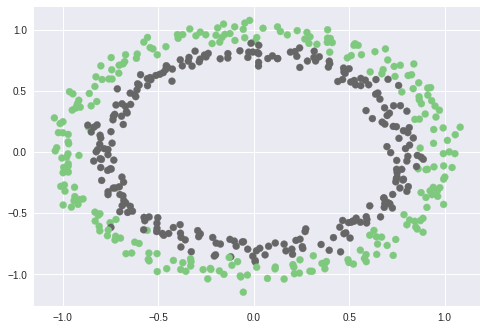

In [ ]:
from sklearn.datasets import make_moons,make_circles
X,Y = make_circles(n_samples=500,shuffle=True,noise=.05,random_state=1,factor=0.8,)
plt.scatter(X[:,0],X[:,1],c=Y,cmap = plt.cm.Accent)

In [ ]:
model  = NeuralNetwork(input_size = 2,layers = [10,4],output_size = 2)

In [ ]:
model.forward(X)

array([[0.07135496, 0.92864504],
       [0.0252705 , 0.9747295 ],
       [0.15439902, 0.84560098],
       [0.02590134, 0.97409866],
       [0.97423778, 0.02576222],
       [0.96419691, 0.03580309],
       [0.03741109, 0.96258891],
       [0.73047016, 0.26952984],
       [0.95510868, 0.04489132],
       [0.02219465, 0.97780535],
       [0.02827971, 0.97172029],
       [0.81149347, 0.18850653],
       [0.03740692, 0.96259308],
       [0.0268464 , 0.9731536 ],
       [0.06447007, 0.93552993],
       [0.96869361, 0.03130639],
       [0.95539586, 0.04460414],
       [0.41339302, 0.58660698],
       [0.10224504, 0.89775496],
       [0.14103553, 0.85896447],
       [0.24757086, 0.75242914],
       [0.04693912, 0.95306088],
       [0.04204106, 0.95795894],
       [0.96445179, 0.03554821],
       [0.028442  , 0.971558  ],
       [0.06121185, 0.93878815],
       [0.6861095 , 0.3138905 ],
       [0.02468014, 0.97531986],
       [0.8907949 , 0.1092051 ],
       [0.97606298, 0.02393702],
       [0.

In [ ]:
model.summary()

W1: (2, 10)
A1: (500, 10)
W2: (10, 4)
A2: (500, 4)
W3: (4, 2)
A3: (500, 2)
